In [ ]:
# Data Analysis Lab - MSCS 634
**Name:** Milan Bista  
**Course:** MSCS 634 - Data Science  
**Assignment:** Lab 1 - Data Visualization, Preprocessing, and Statistical Analysis  
**Date:** 5/29/2025

## Lab Overview
This lab analyzes Sleep Health and Lifestyle Dataset patterns using data visualization, preprocessing, and statistical analysis techniques.

## Dataset Information
- **Source:** Kaggle - Sleep Health and Lifestyle Dataset by Laksika Tharmalingam


In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')
sns.set_palette("husl")

df = pd.read_csv('../sleepHealthAndLifestyle.csv')
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea



This dataset contains demographic, lifestyle, and health-related information about individuals. Key variables include:

- **Numeric:** Sleep Duration (hours), Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps
- **Categorical:** Gender, Occupation, BMI Category, Sleep Disorder status

The data provides a foundation to explore how lifestyle and health indicators relate to sleep quality and duration.


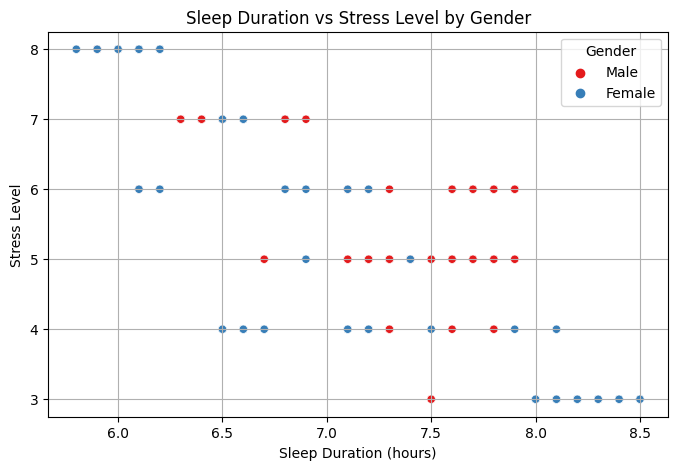

In [52]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Sleep Duration', y='Stress Level', hue='Gender', palette='Set1')
plt.title('Sleep Duration vs Stress Level by Gender')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

Looking at this the scatter plot most people sleep between 7 to 8 hours with stress level of 4 to 6
While the sleep in those duration might not be the alone factor for stress level you can conclude that
if you sleep less than 6 hours, its definitely going to have higher stress level and if you sleep more than 8 hours
stress level decreases significantly mostly for female gender from the above data

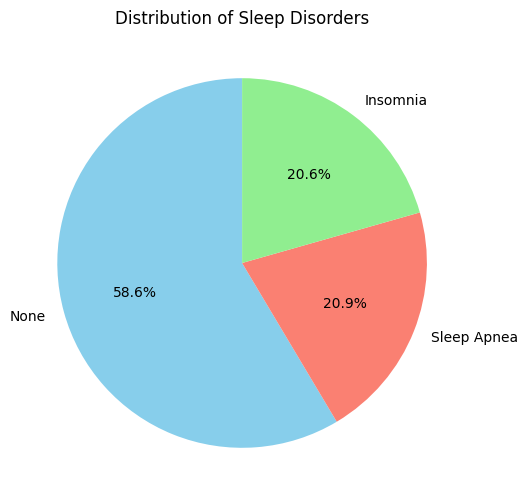

In [53]:
# Pie Chart for Sleep Disorder
disorder_counts = df['Sleep Disorder'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(disorder_counts, labels=disorder_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sleep Disorders')
plt.show()

#This visualization helps highlight that while over half the population reports no sleep disorder, a notable 40% suffer from either insomnia or sleep apnea, indicating a substantial public health concern.

In [54]:
# Display count of missing values
print(df.isnull().sum())


Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [55]:
Q1 = df['Sleep Duration'].quantile(0.25)
Q3 = df['Sleep Duration'].quantile(0.75)
IQR = Q3 - Q1

# Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Sleep Duration'] < lower_bound) | (df['Sleep Duration'] > upper_bound)]

print(f"IQR: {IQR}")
print(f"Outliers found: {len(outliers)}")


IQR: 1.3999999999999995
Outliers found: 0


In [56]:
df = df[(df['Sleep Duration'] >= lower_bound) & (df['Sleep Duration'] <= upper_bound)]
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [57]:
df_sampled = df.sample(frac=0.5, random_state=42)


In [58]:
df_reduced = df_sampled.drop(columns=['Person ID', 'Blood Pressure'])
df_reduced


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
329,Female,53,Engineer,8.5,9,30,3,Normal,65,5000,None
33,Male,31,Doctor,6.1,6,30,8,Normal,72,5000,None
15,Male,29,Doctor,6.0,6,30,8,Normal,70,8000,None
325,Female,53,Engineer,8.5,9,30,3,Normal,65,5000,None
57,Male,32,Doctor,6.0,6,30,8,Normal,72,5000,None
...,...,...,...,...,...,...,...,...,...,...,...
38,Male,31,Doctor,7.6,7,75,6,Normal,70,8000,None
11,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None
245,Female,44,Teacher,6.5,7,45,4,Overweight,65,6000,Insomnia
185,Female,42,Teacher,6.8,6,45,7,Overweight,78,5000,Sleep Apnea


In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_reduced[['Heart Rate', 'Daily Steps']] = scaler.fit_transform(df_reduced[['Heart Rate', 'Daily Steps']])


In [60]:
df_reduced['Age Group'] = pd.cut(df_reduced['Age'], bins=[0, 20, 30, 40, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior'])
df_reduced

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Age Group
329,Female,53,Engineer,8.5,9,30,3,Normal,0.00,0.285714,None,Senior
33,Male,31,Doctor,6.1,6,30,8,Normal,0.35,0.285714,None,Adult
15,Male,29,Doctor,6.0,6,30,8,Normal,0.25,0.714286,None,Young Adult
325,Female,53,Engineer,8.5,9,30,3,Normal,0.00,0.285714,None,Senior
57,Male,32,Doctor,6.0,6,30,8,Normal,0.35,0.285714,None,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
38,Male,31,Doctor,7.6,7,75,6,Normal,0.25,0.714286,None,Adult
11,Male,29,Doctor,7.8,7,75,6,Normal,0.25,0.714286,None,Young Adult
245,Female,44,Teacher,6.5,7,45,4,Overweight,0.00,0.428571,Insomnia,Senior
185,Female,42,Teacher,6.8,6,45,7,Overweight,0.65,0.285714,Sleep Apnea,Senior


In [61]:
# Display info and description of dataset
print("DataFrame Info:")
print(df.info())

print("\nDataFrame Description:")
print(df.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 40.9+ KB
None



In [62]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

central_tendency = pd.DataFrame(index=numeric_cols)
central_tendency['Minimum'] = df[numeric_cols].min()
central_tendency['Maximum'] = df[numeric_cols].max()
central_tendency['Mean'] = df[numeric_cols].mean()
central_tendency['Median'] = df[numeric_cols].median()
central_tendency['Mode'] = df[numeric_cols].mode().iloc[0]  # First mode value

print("Central Tendency Measures:")
print(central_tendency)


Central Tendency Measures:
                         Minimum  Maximum         Mean  Median    Mode
Person ID                    1.0    374.0   187.500000   187.5     1.0
Age                         27.0     59.0    42.184492    43.0    43.0
Sleep Duration               5.8      8.5     7.132086     7.2     7.2
Quality of Sleep             4.0      9.0     7.312834     7.0     8.0
Physical Activity Level     30.0     90.0    59.171123    60.0    60.0
Stress Level                 3.0      8.0     5.385027     5.0     3.0
Heart Rate                  65.0     86.0    70.165775    70.0    68.0
Daily Steps               3000.0  10000.0  6816.844920  7000.0  8000.0


In [63]:
dispersion = pd.DataFrame(index=numeric_cols)
dispersion['Range'] = df[numeric_cols].max() - df[numeric_cols].min()
dispersion['Q1'] = df[numeric_cols].quantile(0.25)
dispersion['Q3'] = df[numeric_cols].quantile(0.75)
dispersion['IQR'] = dispersion['Q3'] - dispersion['Q1']
dispersion['Variance'] = df[numeric_cols].var()
dispersion['Std Dev'] = df[numeric_cols].std()

print("Dispersion Measures:")
print(dispersion)


Dispersion Measures:
                          Range       Q1       Q3      IQR      Variance  \
Person ID                 373.0    94.25   280.75   186.50  1.168750e+04   
Age                        32.0    35.25    50.00    14.75  7.522324e+01   
Sleep Duration              2.7     6.40     7.80     1.40  6.330696e-01   
Quality of Sleep            5.0     6.00     8.00     2.00  1.432703e+00   
Physical Activity Level    60.0    45.00    75.00    30.00  4.339224e+02   
Stress Level                5.0     4.00     7.00     3.00  3.148944e+00   
Heart Rate                 21.0    68.00    72.00     4.00  1.710381e+01   
Daily Steps              7000.0  5600.00  8000.00  2400.00  2.617651e+06   

                             Std Dev  
Person ID                 108.108742  
Age                         8.673133  
Sleep Duration              0.795657  
Quality of Sleep            1.196956  
Physical Activity Level    20.830804  
Stress Level                1.774526  
Heart Rate           

Correlation Matrix:
                         Person ID       Age  Sleep Duration  \
Person ID                 1.000000  0.990516        0.296305   
Age                       0.990516  1.000000        0.344709   
Sleep Duration            0.296305  0.344709        1.000000   
Quality of Sleep          0.431612  0.473734        0.883213   
Physical Activity Level   0.149882  0.178993        0.212360   
Stress Level             -0.394287 -0.422344       -0.811023   
Heart Rate               -0.225467 -0.225606       -0.516455   
Daily Steps               0.043844  0.057973       -0.039533   

                         Quality of Sleep  Physical Activity Level  \
Person ID                        0.431612                 0.149882   
Age                              0.473734                 0.178993   
Sleep Duration                   0.883213                 0.212360   
Quality of Sleep                 1.000000                 0.192896   
Physical Activity Level          0.192896            

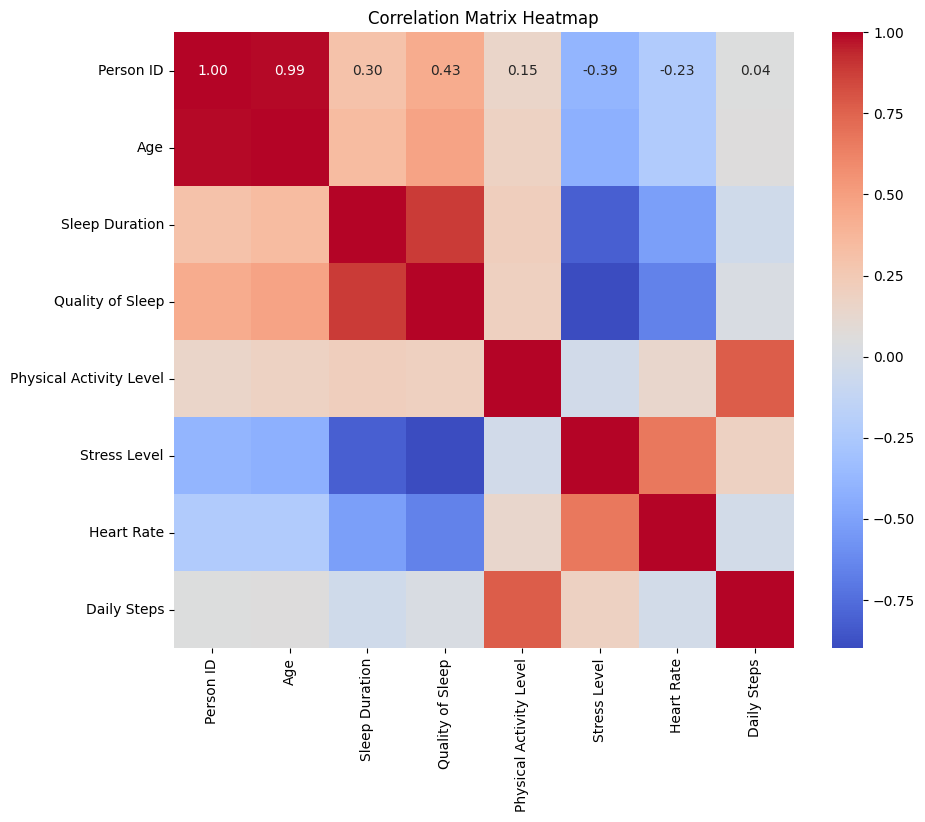

In [66]:
correlation_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# visualize with heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


Correlation Matrix:
                              Age  Sleep Duration  Quality of Sleep  \
Age                      1.000000        0.368497          0.496011   
Sleep Duration           0.368497        1.000000          0.881730   
Quality of Sleep         0.496011        0.881730          1.000000   
Physical Activity Level  0.225678        0.212433          0.217761   
Stress Level            -0.450223       -0.840559         -0.907235   
Heart Rate              -0.321966       -0.599637         -0.762952   
Daily Steps              0.158512        0.014384          0.119668   

                         Physical Activity Level  Stress Level  Heart Rate  \
Age                                     0.225678     -0.450223   -0.321966   
Sleep Duration                          0.212433     -0.840559   -0.599637   
Quality of Sleep                        0.217761     -0.907235   -0.762952   
Physical Activity Level                 1.000000     -0.065398    0.046473   
Stress Level         

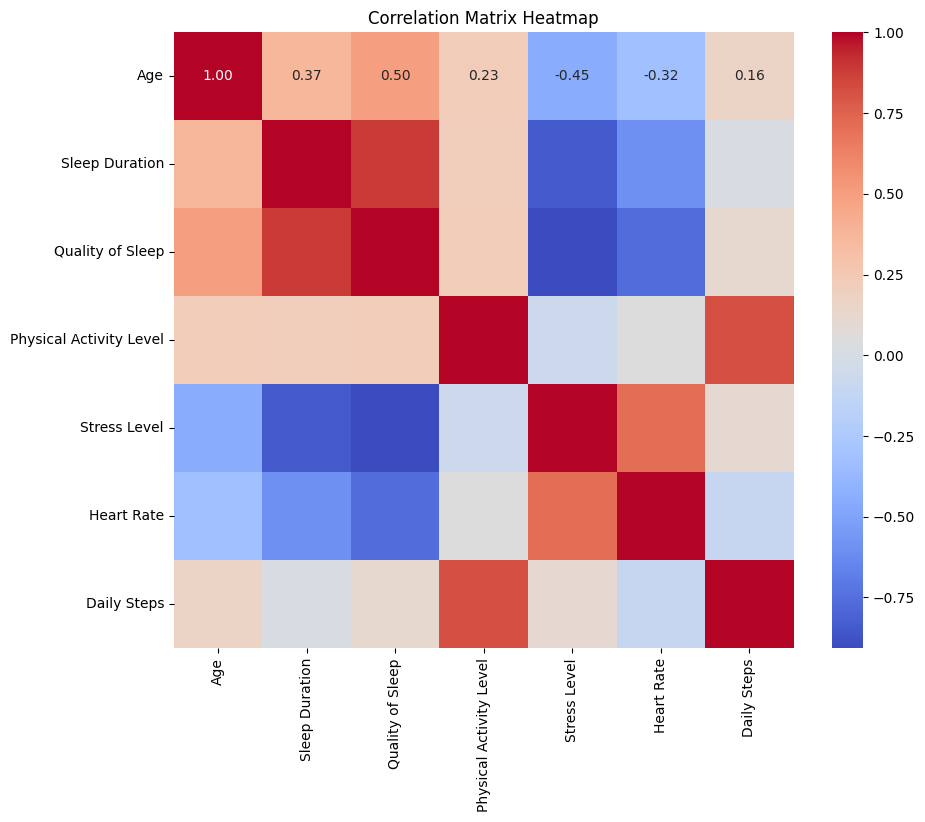

In [68]:
# Clean up column list
numeric_cols = [col for col in numeric_cols if col in df_reduced.columns]

# Compute correlation
correlation_matrix = df_reduced[numeric_cols].corr()

# Display
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()
